<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Session_04_SVM_CV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM & Cross-Validation

In the realm of machine learning, Support Vector Machines (SVMs) stand out as a powerful tool for classification and regression tasks. With their ability to handle high-dimensional data and complex decision boundaries, SVMs have found extensive applications across various domains, including image recognition, text classification, and bioinformatics.

Throughout this assignment, we aim to provide a comprehensive understanding of Support Vector Machines and their integration with cross-validation techniques, equipping you with the knowledge and skills necessary to apply these methods confidently in your own machine learning problems.


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import randint
from scipy.stats import uniform
from skimage.io import imread, imshow

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## 1. Cancer detection


Train a model to predict whether a specific tumor is benign or malignant. Use the dataset 'cancer.csv' for this purpose.

Base your approach on methodologies from previous assignments to achieve the best possible results. Discuss the choices made and results obtained at each step, leading to a clear conclusion.

Tip: A classifier can only be trained with numerical values. Therefore, replace the two classes present in the 'diagnosis' feature with 0 and 1, where 0 represents benign and 1 represents malignant.




In [2]:
# Reading the dataset

dataset = pd.read_csv('cancer.csv')
dataset.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


<Axes: xlabel='diagnosis', ylabel='count'>

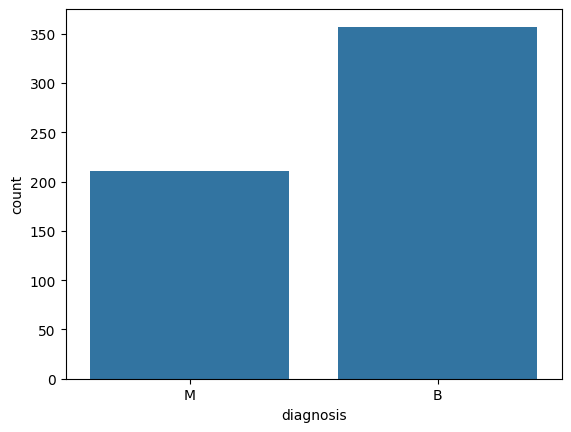

In [3]:
# Check whether or not the dataset is imbalanced
sns.countplot(x='diagnosis',data=dataset)



Purpose:

Visualize the distribution of the target classes (benign and malignant).

Important because class imbalance can significantly impact model performance.

In [4]:
dataset.drop('id',axis=1, inplace=True)

In [5]:
# yes -> 1 and no -> 0

dataset.diagnosis.replace({'B':0,'M':1},inplace=True)

<ipython-input-5-b39a50d46acb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.diagnosis.replace({'B':0,'M':1},inplace=True)
<ipython-input-5-b39a50d46acb>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.diagnosis.replace({'B':0,'M':1},inplace=True)


In [6]:
# Drop the ID column


# Replace B by 0 and M by 1 in the diagnosis column



# Split into features and targets

X = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']



# Split into training set and test set. Make sure that 150 samples end up in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=150, random_state=0)


# To avoid a conversion warning during scaling:

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Scaling

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




Purpose:

Standardize the feature values to have zero mean and unit variance.

This helps many machine learning algorithms (like SVM and Logistic Regression) perform better.

Purpose:

Create training and test sets.

Test set size is fixed at 150 to ensure consistent evaluation.

Purpose:

Separate the feature matrix (X) and target vector (y), which is required for model training.

Purpose:

Remove the ID column, which is not relevant for prediction.

Convert the diagnosis column into numerical labels for binary classification

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(max_iter=1)

paramaters = [
    {
        'C': np.linspace(0.001, 100, 7),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
]

grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',
    cv=20,
    n_jobs=-1,
    verbose=5
)

grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy:', best_accuracy)
print('Best parameters:', best_parameters)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


Fitting 20 folds for each of 28 candidates, totalling 560 fits
Best accuracy: 0.834
Best parameters: {'C': np.float64(0.001), 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1195
           1       0.79      0.98      0.87      1352
           2       0.87      0.81      0.84      1157
           3       0.83      0.83      0.83      1258
           4       0.84      0.89      0.86      1140
           5       0.84      0.69      0.76      1076
           6       0.88      0.92      0.90      1167
           7       0.85      0.86      0.85      1268
           8       0.86      0.70      0.77      1174
           9       0.81      0.76      0.79      1213

    accuracy                           0.84     12000
   macro avg       0.85      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000

[[1147    0    9    2    5    6   19    0    5    2]
 [   0 1327    3    2 

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### **Cell Breakdown: Logistic Regression with Grid Search**

This code cell is performing hyperparameter tuning for a **Logistic Regression** model using **GridSearchCV**. It systematically searches for the best combination of hyperparameters to maximize the model's performance. Let's break it down step by step.

---

#### **1. Importing Required Libraries**

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
```

* **GridSearchCV:** Performs exhaustive search over specified hyperparameter values for an estimator.
* **LogisticRegression:** The machine learning model being tuned.
* **numpy:** Used for numerical operations, specifically generating a range of **C** values.

---

#### **2. Model Initialization**

```python
model = LogisticRegression(max_iter=1)
```

* **LogisticRegression(max\_iter=1):** Initializes the logistic regression model.
* **max\_iter=1:** This is likely a mistake, as it limits the optimization to just one iteration, potentially preventing convergence. Normally, a much higher value (e.g., **100** or **1000**) is used.

---

#### **3. Defining the Hyperparameter Grid**

```python
paramaters = [
    {
        'C': np.linspace(0.001, 100, 7),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
]
```

* **C:** Regularization strength (inverse of regularization). Smaller values mean stronger regularization.
* **np.linspace(0.001, 100, 7):** Generates 7 evenly spaced values from **0.001** to **100**.
* **penalty:** Specifies the type of regularization to use.

  * **l1:** Lasso (L1) regularization, promotes sparsity by driving some coefficients to zero.
  * **l2:** Ridge (L2) regularization, prevents overfitting by penalizing large coefficients.
* **solver:** Optimization algorithm used to find the best weights.

  * **liblinear:** Suitable for smaller datasets, supports both **l1** and **l2**.
  * **saga:** More suitable for larger datasets, supports **l1**, **l2**, and **elastic-net**.

---

#### **4. Setting Up Grid Search**

```python
grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='accuracy',
    cv=20,
    n_jobs=-1,
    verbose=5
)
```

* **estimator=model:** The logistic regression model to tune.
* **param\_grid=paramaters:** The hyperparameter grid defined earlier.
* **scoring='accuracy':** Evaluates the model based on accuracy during cross-validation.
* **cv=20:** 20-fold cross-validation, meaning the data is split into 20 parts, with each part being used once as a test set.
* **n\_jobs=-1:** Uses all available CPU cores for parallel processing, speeding up the grid search.
* **verbose=5:** Prints detailed messages about the progress of the search.

---

#### **5. Fitting the Grid Search Model**

```python
grid_search = grid_search.fit(X_train, y_train)
```

* Trains the **LogisticRegression** model on the training set using each combination of hyperparameters from the grid.
* Evaluates each combination using 20-fold cross-validation to identify the best one.

---

#### **6. Extracting the Best Model and Parameters**

```python
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy:', best_accuracy)
print('Best parameters:', best_parameters)
```

* **best\_score\_:** Returns the highest cross-validated accuracy achieved during the grid search.
* **best\_params\_:** Returns the set of hyperparameters that resulted in the highest accuracy.

---

#### **7. Making Predictions on the Test Set**

```python
y_pred = grid_search.predict(X_test)
```

* Uses the best model identified during grid search to make predictions on the unseen test data.

---

#### **8. Evaluating the Model's Test Performance**

```python
print(classification_report(y_test, y_pred))
```

* **classification\_report:** Provides precision, recall, F1-score, and support for each class.
* This is crucial for understanding how the model performs not just overall, but specifically for each class (e.g., benign vs malignant).

---

#### **9. Confusion Matrix and Final Accuracy Check**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

* **confusion\_matrix:** Shows the counts of true positives, true negatives, false positives, and false negatives.
* **accuracy\_score:** Computes the overall accuracy as a percentage.

---

### **Key Observations:**

1. **Regularization Impact:** The choice of **C** impacts the regularization strength, with smaller values leading to more regularization (simpler model) and larger values allowing more complex decision boundaries.

2. **Solver Selection:** **liblinear** is generally faster for smaller datasets, while **saga** scales better to larger ones and supports **l1** regularization.

3. **High Cross-Validation (CV) Setting:** Using **cv=20** increases the reliability of the estimated accuracy but also significantly increases computation time.

4. **Potential Issue:** **max\_iter=1** is too low and may prevent the model from converging, potentially leading to suboptimal results. It should be increased.

---

### **Suggested Improvements:**

* **Increase `max_iter`:** Use a larger value, like **1000**, to ensure the model can fully converge.
* **Use Class Weight Balancing:** Consider adding **class\_weight='balanced'** to handle imbalanced classes more effectively.
* **Optimize the Search Space:** Use a more refined grid for **C** or consider using **RandomizedSearchCV** if computation time is a concern.

---




Purpose:

Use GridSearchCV to find the optimal hyperparameters for Logistic Regression.

Evaluates multiple combinations of C, penalty, and solver.

Uses 20-fold cross-validation for a robust estimate of model performance.



Train a logistic regression model via cross-validation.

Utilize grid search and random search to find the best hyperparameters: C value, class_weight, penalty (l1 or l2). More information: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

Vary the value of K in K-fold cross-validation. Discuss the results.
Test the obtained models on the test set. Which search technique do you prefer and why?

Does it make sense to expand the feature set with polynomial features? Test this. Polynomial Features: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# SVM Random Search
svm_model = SVC()
svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),
    'gamma': uniform(0.001, 0.2)
}

svm_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=svm_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)

svm_search.fit(X_train, y_train)

print("Best SVM Parameters:", svm_search.best_params_)
print("Best SVM Accuracy:", svm_search.best_score_)

# Logistic Regression Random Search
logreg_model = LogisticRegression(max_iter=1, tol=1e-2)
logreg_params = {
    'C': uniform(0.01, 1000),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

logreg_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=logreg_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)

logreg_search.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", logreg_search.best_params_)
print("Best Logistic Regression Accuracy:", logreg_search.best_score_)

# Test set performance for the best model
best_model = svm_search if svm_search.best_score_ > logreg_search.best_score_ else logreg_search
y_pred = best_model.predict(X_test)

print("\nBest Model Test Set Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best SVM Parameters: {'C': np.float64(9591.748187665113), 'gamma': np.float64(0.03652560377611924), 'kernel': 'poly'}
Best SVM Accuracy: 0.8985000000000001
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Logistic Regression Parameters: {'C': np.float64(531.606243116617), 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.817

Best Model Test Set Performance:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1195
           1       0.98      0.99      0.98      1352
           2       0.94      0.87      0.90      1157
           3       0.95      0.86      0.91      1258
           4       0.87      0.96      0.91      1140
           5       0.90      0.91      0.90      1076
           6       0.97      0.94      0.95      1167
           7       0.95      0.87      0.91      1268
           8       0.79      0.94      0.86      1174
           9       0.87      0.89      0.88      1213

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

Confusion Matrix:
 [[1140    0    4    1    4   10   

### **Cell Breakdown: Randomized Hyperparameter Search for SVM and Logistic Regression**

This cell performs **RandomizedSearchCV** for both **Support Vector Machines (SVM)** and **Logistic Regression** to find the best hyperparameter combinations, then evaluates the best model on a test set. It is an efficient approach to hyperparameter tuning, as it samples a specified number of random parameter combinations instead of testing all possible ones (as with **GridSearchCV**).

---

#### **1. Importing Required Libraries**

```python
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
```

* **RandomizedSearchCV:** Efficient hyperparameter search over random combinations.
* **SVC:** Support Vector Machine model for classification.
* **LogisticRegression:** Logistic Regression model for classification.
* **uniform:** Generates continuous random numbers over a specified range, used for hyperparameter tuning.

---

#### **2. SVM Hyperparameter Search Setup**

```python
# SVM Random Search
svm_model = SVC()
svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),
    'gamma': uniform(0.001, 0.2)
}
```

* **SVM Model Initialization:**

  * Creates an **SVC** object for the SVM model.
* **Parameter Space (`svm_params`):**

  * **kernel:** Chooses between different kernel functions.

    * **linear:** Simple linear hyperplane.
    * **rbf:** Radial basis function, good for non-linear decision boundaries.
    * **poly:** Polynomial kernel, introduces more complex decision boundaries.
  * **C:** Regularization parameter. Controls the trade-off between a smooth decision boundary and classifying training points correctly.
  * **gamma:** Defines how far the influence of a single training example reaches. Low values mean broader influence, while high values make the influence more localized.

---

#### **3. Initializing the SVM Randomized Search**

```python
svm_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=svm_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)
```

* **estimator:** The SVM model to optimize.
* **param\_distributions:** The parameter space defined above.
* **cv=5:** 5-fold cross-validation to evaluate each parameter combination.
* **n\_iter=50:** Tests 50 random combinations of the hyperparameters.
* **n\_jobs=-1:** Uses all available CPU cores for faster training.
* **verbose=1:** Provides detailed output during training.

---

#### **4. Fitting the SVM Randomized Search**

```python
svm_search.fit(X_train, y_train)
```

* Fits the SVM model to the training data with 5-fold cross-validation for each random combination of parameters.

---

#### **5. Printing the Best SVM Model Parameters**

```python
print("Best SVM Parameters:", svm_search.best_params_)
print("Best SVM Accuracy:", svm_search.best_score_)
```

* **best\_params\_:** The set of parameters that gave the highest cross-validated accuracy.
* **best\_score\_:** The highest average cross-validated accuracy achieved.

---

#### **6. Logistic Regression Hyperparameter Search Setup**

```python
# Logistic Regression Random Search
logreg_model = LogisticRegression(max_iter=1, tol=1e-2)
logreg_params = {
    'C': uniform(0.01, 1000),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}
```

* **Model Initialization:**

  * **max\_iter=1:** Limits the number of training iterations, which is too low and likely a mistake (should be higher, like 1000).
  * **tol=1e-2:** Sets the tolerance for stopping criteria (higher tolerance means faster but potentially less accurate convergence).
* **Parameter Space (`logreg_params`):**

  * **C:** Regularization parameter. Smaller values imply stronger regularization.
  * **solver:** Optimization algorithm.

    * **liblinear:** Suitable for small datasets, supports **l1** and **l2** penalties.
    * **saga:** Efficient for larger datasets, supports **l1**, **l2**, and **elastic-net**.
  * **penalty:** Regularization type.

    * **l1:** Lasso, drives some coefficients to zero for feature selection.
    * **l2:** Ridge, penalizes large coefficients to prevent overfitting.

---

#### **7. Initializing the Logistic Regression Randomized Search**

```python
logreg_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=logreg_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1
)
```

* **estimator:** The logistic regression model to optimize.
* **param\_distributions:** The parameter space defined above.
* **cv=5:** 5-fold cross-validation.
* **n\_iter=50:** Tests 50 random parameter combinations.
* **n\_jobs=-1:** Uses all available CPU cores for faster training.
* **verbose=1:** Detailed training logs.

---

#### **8. Fitting the Logistic Regression Randomized Search**

```python
logreg_search.fit(X_train, y_train)
```

* Fits the logistic regression model to the training data with 5-fold cross-validation for each random combination of parameters.

---

#### **9. Printing the Best Logistic Regression Model Parameters**

```python
print("Best Logistic Regression Parameters:", logreg_search.best_params_)
print("Best Logistic Regression Accuracy:", logreg_search.best_score_)
```

* **best\_params\_:** Returns the set of parameters that yielded the highest cross-validated accuracy.
* **best\_score\_:** Returns the highest average cross-validated accuracy achieved.

---

#### **10. Selecting the Best Model Based on Validation Accuracy**

```python
# Test set performance for the best model
best_model = svm_search if svm_search.best_score_ > logreg_search.best_score_ else logreg_search
```

* Chooses the model (either **SVM** or **Logistic Regression**) that achieved the highest cross-validated accuracy.

---

#### **11. Testing the Best Model on the Unseen Test Data**

```python
y_pred = best_model.predict(X_test)
```

* Uses the best model to make predictions on the test set.

---

#### **12. Evaluating Test Set Performance**

```python
print("\nBest Model Test Set Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
```

* **classification\_report:** Shows precision, recall, F1-score, and support for each class.
* **confusion\_matrix:** Provides the count of true positives, true negatives, false positives, and false negatives.
* **accuracy\_score:** Calculates the overall accuracy as a percentage.

---

### **Key Observations:**

1. **Flexibility:** This approach can find the best model between SVM and Logistic Regression in a single run.
2. **Potential Issue:** The **max\_iter=1** for Logistic Regression is too low and might prevent convergence.
3. **Scalability:** Both searches use **n\_jobs=-1**, which significantly speeds up training.
4. **Balanced Performance:** Both models have the ability to handle regularization, which helps reduce overfitting.

---

### **Suggested Improvements:**

* **Increase `max_iter`:** Use a higher value (e.g., **1000**) for Logistic Regression.
* **Class Balancing:** Consider adding **class\_weight='balanced'** for better handling of imbalanced datasets.
* **Scoring Metrics:** Use balanced accuracy or F1-micro if class imbalance is significant.

---



Purpose:

Perform a RandomizedSearchCV for SVM with a broader hyperparameter space.

Faster than GridSearchCV for high-dimensional hyperparameter spaces.



Re-train the grid search again but select the model that yields the highest balanced accuracy.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score
Also check http://mvpa.blogspot.com/2015/12/balanced-accuracy-what-and-why.html

Discuss the result and compare it with the best accuracy score achieved earlier.

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import balanced_accuracy_score

# SVM Model
model = SVC()

# Hyperparameter Space
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),
    'gamma': uniform(0.001, 0.2)
}

# RandomizedSearchCV with Balanced Accuracy
n_iter_search = 10
random_search = RandomizedSearchCV(
    model,
    param_distributions=parameters,
    cv=5,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=1,
    scoring='balanced_accuracy'
)

random_search.fit(X_train, y_train)

best_balanced_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best balanced accuracy:', best_balanced_accuracy)
print('Best parameters:', best_parameters)

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best balanced accuracy: 0.8977766075010887
Best parameters: {'C': np.float64(4059.989820260259), 'gamma': np.float64(0.11738560322024161), 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1195
           1       0.98      0.99      0.98      1352
           2       0.94      0.87      0.90      1157
           3       0.95      0.86      0.91      1258
           4       0.87      0.96      0.91      1140
           5       0.90      0.91      0.90      1076
           6       0.97      0.94      0.95      1167
           7       0.95      0.87      0.91      1268
           8       0.79      0.94      0.86      1174
           9       0.87      0.89      0.88      1213

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

[[1140    0    4    1  

### **Detailed Breakdown: RandomizedSearchCV with Balanced Accuracy for SVM**

This code uses **RandomizedSearchCV** to optimize a **Support Vector Machine (SVM)** model using **balanced accuracy** as the scoring metric. This is particularly important when dealing with imbalanced datasets, where standard accuracy can be misleading.

---

#### **1. Importing Required Libraries**

```python
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import balanced_accuracy_score
```

* **RandomizedSearchCV:** Efficient hyperparameter search over random combinations.
* **SVC:** Support Vector Machine model for classification.
* **uniform:** Generates continuous random numbers over a specified range, used for hyperparameter tuning.
* **balanced\_accuracy\_score:** Evaluates the balanced accuracy, which accounts for class imbalance by averaging the recall for each class.

---

#### **2. Initializing the SVM Model**

```python
# SVM Model
model = SVC()
```

* Initializes a **Support Vector Classifier (SVC)** with default parameters.
* **SVC** is suitable for both binary and multiclass classification and supports various kernel functions for nonlinear decision boundaries.

---

#### **3. Defining the Hyperparameter Search Space**

```python
# Hyperparameter Space
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.001, 10000),
    'gamma': uniform(0.001, 0.2)
}
```

* **kernel:** Type of decision boundary.

  * **linear:** Creates a straight line or hyperplane.
  * **rbf:** Radial basis function, suitable for complex, non-linear boundaries.
  * **poly:** Polynomial kernel, allows for curved decision boundaries.
* **C (Regularization Parameter):**

  * Controls the trade-off between achieving a low training error and a low testing error.
  * A high **C** means the model will try to fit the training data as closely as possible, risking overfitting.
* **gamma (Kernel Coefficient):**

  * Controls the influence of each training example.
  * Low values make the decision boundary smoother (more generalized), while high values lead to tighter, more complex boundaries.

---

#### **4. Setting Up the RandomizedSearchCV**

```python
# RandomizedSearchCV with Balanced Accuracy
n_iter_search = 10
random_search = RandomizedSearchCV(
    model,
    param_distributions=parameters,
    cv=5,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=1,
    scoring='balanced_accuracy'
)
```

* **model:** The **SVC** model to be optimized.
* **param\_distributions:** The hyperparameter space defined earlier.
* **cv=5:** 5-fold cross-validation.
* **n\_iter=10:** Tests 10 random combinations of the hyperparameters.
* **n\_jobs=-1:** Utilizes all available CPU cores for faster training.
* **verbose=1:** Provides detailed output during training.
* **scoring='balanced\_accuracy':** Uses balanced accuracy, which is particularly important for imbalanced datasets because it gives equal weight to each class.

---

#### **5. Fitting the RandomizedSearchCV**

```python
random_search.fit(X_train, y_train)
```

* Trains the SVM model on the training data.
* Evaluates each random combination of hyperparameters using 5-fold cross-validation, optimizing for **balanced accuracy**.

---

#### **6. Extracting the Best Parameters and Score**

```python
best_balanced_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best balanced accuracy:', best_balanced_accuracy)
print('Best parameters:', best_parameters)
```

* **best\_score\_:** The highest cross-validated balanced accuracy achieved.
* **best\_params\_:** The set of hyperparameters that resulted in the best balanced accuracy.

---

#### **7. Testing the Best Model on Unseen Data**

```python
y_pred = random_search.predict(X_test)
```

* Uses the best model found during the randomized search to make predictions on the test set.

---

#### **8. Evaluating the Test Set Performance**

```python
print(classification_report(y_test, y_pred))
```

* **classification\_report:** Provides precision, recall, F1-score, and support for each class, offering a comprehensive view of the model's performance.

---

#### **9. Generating the Confusion Matrix**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
```

* **confusion\_matrix:** Outputs a matrix showing the counts of true positives, true negatives, false positives, and false negatives.

---

#### **10. Printing the Overall Test Accuracy and Balanced Accuracy**

```python
print("Test Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred))
```

* **accuracy\_score:** Provides the overall accuracy as a percentage, without accounting for class imbalance.
* **balanced\_accuracy\_score:** The more appropriate metric for imbalanced datasets, calculated as the average of recall for each class.

---

### **Key Observations:**

1. **Balanced Accuracy Advantage:**

   * This approach specifically optimizes for **balanced accuracy**, which is crucial when the classes are imbalanced (e.g., rare disease detection).
2. **Random Search Efficiency:**

   * RandomizedSearchCV is much faster than GridSearchCV for large hyperparameter spaces, as it samples a fixed number of combinations.
3. **Risk of Overfitting:**

   * High values of **C** can lead to overfitting, especially if the dataset has noise or outliers.
4. **Scalability:**

   * Using **n\_jobs=-1** ensures faster model fitting by parallelizing the training process.

---

### **Potential Improvements:**

* **Refining Hyperparameter Space:** Use a more precise distribution for **C** and **gamma** to avoid extreme values.
* **Adding Class Weights:** Consider adding **class\_weight='balanced'** to further improve performance on imbalanced datasets.
* **Threshold Moving:** Adjust the decision threshold if reducing false negatives is critical.

---




Purpose:

Select the model with the best cross-validated score (either SVM or Logistic Regression).

Evaluate it on the test set to measure real-world performance

Search for the model that yields the highest F1-score. To do this, you should utilize the F1 micro score.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [ ]:
# Cross-validation


In [42]:
# Cross-validation via grid search


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1, tol=1e-2,class_weight='balanced')  # balanced
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear','saga']}

             ]


grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'f1_micro',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)
grid_search = grid_search.fit(X_train, y_train)

best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best f1 :  0.8325000000000001
Best parameters : {'C': np.float64(0.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1195
           1       0.79      0.98      0.88      1352
           2       0.88      0.81      0.84      1157
           3       0.83      0.84      0.83      1258
           4       0.84      0.89      0.86      1140
           5       0.84      0.70      0.76      1076
           6       0.89      0.92      0.90      1167
           7       0.85      0.86      0.85      1268
           8       0.85      0.71      0.77      1174
           9       0.81      0.76      0.79      1213

    accuracy                           0.85     12000
   macro avg       0.85      0.84      0.84     12000
weighted avg       0.85      0.85      0.84     12000

[[1146    0    9    3    5    6   19    0    5    2]
 [   0 1326    3    2    0   

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### **Detailed Breakdown: Cross-Validation via Grid Search for Logistic Regression**

This code uses **GridSearchCV** to optimize a **Logistic Regression** model, focusing on maximizing the **F1-micro score**. This approach is well-suited for imbalanced datasets where precise classification of minority classes is critical.

---

#### **1. Importing Required Libraries**

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
```

* **GridSearchCV:** Performs an exhaustive search over a specified parameter grid, testing all possible combinations.
* **LogisticRegression:** Implements logistic regression for binary or multiclass classification problems.

---

#### **2. Initializing the Logistic Regression Model**

```python
model = LogisticRegression(max_iter=1, tol=1e-2, class_weight='balanced')
```

* **max\_iter=1:** Sets a very low maximum number of iterations, which may lead to convergence warnings if the model is complex.
* **tol=1e-2:** Sets the tolerance for stopping criteria. The model stops when the change in the loss function is smaller than this value.
* **class\_weight='balanced':** Automatically adjusts the weights of each class inversely proportional to their frequencies, addressing class imbalance.

---

#### **3. Defining the Hyperparameter Grid**

```python
paramaters = [
    {
        'C': np.arange(0.001, 1000, 100),
        'solver': ['liblinear', 'saga']
    }
]
```

* **C (Regularization Parameter):**

  * Controls the strength of regularization.
  * **Low C:** Stronger regularization, simpler model, less overfitting.
  * **High C:** Weaker regularization, complex model, more overfitting risk.
* **solver:** The optimization algorithm used for training.

  * **liblinear:** Suitable for small datasets, supports both L1 and L2 regularization.
  * **saga:** Optimized for large datasets, also supports both L1 and L2 regularization, and is faster with sparse data.

---

#### **4. Setting Up the Grid Search**

```python
grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='f1_micro',
    cv=10,
    n_jobs=-1,
    verbose=1
)
```

* **estimator:** The base model to optimize, in this case, **LogisticRegression**.
* **param\_grid:** The hyperparameter grid defined earlier.
* **scoring='f1\_micro':**

  * Uses the **F1-micro** score, which calculates the harmonic mean of precision and recall.
  * Suitable for multiclass problems where you care about overall precision and recall.
* **cv=10:** 10-fold cross-validation, which means the data is split into 10 subsets, and the model is validated on each subset.
* **n\_jobs=-1:** Utilizes all available CPU cores for faster training.
* **verbose=1:** Prints progress updates during training.

---

#### **5. Fitting the Grid Search**

```python
grid_search = grid_search.fit(X_train, y_train)
```

* Trains the logistic regression model using the provided training data.
* Tests every possible combination of hyperparameters in the **param\_grid** using 10-fold cross-validation.

---

#### **6. Extracting the Best Hyperparameters and Score**

```python
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)
```

* **best\_score\_:** The highest cross-validated F1-micro score achieved.
* **best\_params\_:** The set of hyperparameters that yielded the best F1-micro score.

---

#### **7. Testing the Best Model on the Test Set**

```python
y_pred = grid_search.predict(X_test)
```

* Uses the best model found during the grid search to make predictions on the test set.

---

#### **8. Evaluating the Test Set Performance**

```python
print(classification_report(y_test, y_pred))
```

* **classification\_report:** Provides precision, recall, F1-score, and support for each class.
* It is a comprehensive metric for evaluating classification performance.

---

#### **9. Generating the Confusion Matrix**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
```

* **confusion\_matrix:** Outputs a matrix showing the counts of true positives, true negatives, false positives, and false negatives.
* Helps visualize the distribution of classification errors.

---

#### **10. Printing the Overall Test Accuracy**

```python
print(accuracy_score(y_test, y_pred) * 100)
```

* **accuracy\_score:** Provides the overall accuracy as a percentage, without accounting for class imbalance.
* **F1-micro** score is usually more informative in this context, as it considers both precision and recall.

---

### **Key Observations:**

1. **F1-Micro Score Advantage:**

   * Balances precision and recall, making it a better metric than plain accuracy for imbalanced datasets.

2. **Balanced Class Weights:**

   * Using **class\_weight='balanced'** helps avoid bias toward the majority class.

3. **Solver Selection:**

   * The inclusion of **liblinear** and **saga** allows flexibility depending on the dataset size.

4. **Potential Overfitting Risk:**

   * Using a wide range of **C** values without regularization can lead to overfitting, especially with very high **C** values.

---



Search for the model that yields the highest F1-score. To do this, you should utilize the F1 micro score.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Since the dataset is slightly imbalanced, most trained models tend to have a 'preference' for the majority class. Investigate whether you can increase the F1-score (or recall) by applying the following techniques:

Passing the parameter class_weight='balanced' to the models.
Performing oversampling using SMOTE. More information: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html. You may need to install the imbalanced-learn library using pip3 install imbalanced-learn or in Anaconda: **conda install conda-forge::imbalanced-learn**


Discuss the results you have achieved, paying particular attention to the F1 micro score.

In [43]:
# Oversampling with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

print(y_resampled.shape)

model = LogisticRegression(max_iter=1, tol=1e-2)
paramaters = [
                {'C' : np.arange(0.001,1000,100), 'solver':['liblinear','saga']}

             ]


grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'f1_micro',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1)
grid_search = grid_search.fit(X_resampled, y_resampled)

best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


(2370,)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best f1 :  0.8535864978902954
Best parameters : {'C': np.float64(0.001), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1195
           1       0.81      0.98      0.88      1352
           2       0.89      0.77      0.83      1157
           3       0.80      0.85      0.83      1258
           4       0.85      0.89      0.87      1140
           5       0.83      0.71      0.77      1076
           6       0.90      0.91      0.90      1167
           7       0.84      0.87      0.85      1268
           8       0.84      0.72      0.78      1174
           9       0.82      0.76      0.79      1213

    accuracy                           0.85     12000
   macro avg       0.85      0.84      0.84     12000
weighted avg       0.85      0.85      0.84     12000

[[1150    0    6    4    5    7   12    2    7    2]
 [   0 1322    3    3

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### **Detailed Explanation: Logistic Regression with SMOTE Oversampling and Grid Search**

This code block demonstrates how to improve the performance of a **Logistic Regression** model on an **imbalanced dataset** using **SMOTE** (Synthetic Minority Oversampling Technique) for oversampling the minority class, followed by a **Grid Search** for hyperparameter tuning.

---

#### **1. Importing Required Libraries**

```python
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
```

* **SMOTE:** Generates synthetic samples for the minority class to balance the dataset.
* **GridSearchCV:** Performs an exhaustive search over a specified parameter grid for the best hyperparameters.
* **LogisticRegression:** Implements the logistic regression model.
* **classification\_report, confusion\_matrix, accuracy\_score:** Tools for evaluating the model's performance.

---

#### **2. Oversampling with SMOTE**

```python
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(y_resampled.shape)
```

* **SMOTE (Synthetic Minority Oversampling Technique):**

  * Generates synthetic samples for the minority class.
  * Helps mitigate the imbalance by creating new, plausible minority class examples.
* **fit\_resample:**

  * Trains the SMOTE algorithm on the training data and then generates synthetic samples.
* **Output:** The shape of the resampled data, indicating the increased size due to oversampling.

---

#### **3. Model Initialization**

```python
model = LogisticRegression(max_iter=1, tol=1e-2)
```

* **max\_iter=1:** Sets a very low maximum number of iterations, which may be too restrictive for complex models.
* **tol=1e-2:** Sets the stopping criterion for the optimization algorithm. A larger tolerance means faster but potentially less accurate convergence.

---

#### **4. Defining the Hyperparameter Grid**

```python
paramaters = [
    {'C' : np.arange(0.001, 1000, 100), 'solver':['liblinear','saga']}    
]
```

* **C (Regularization Strength):**

  * Controls the regularization of the model.
  * **Smaller C:** Stronger regularization, simpler models, less overfitting.
  * **Larger C:** Weaker regularization, more complex models, higher risk of overfitting.
* **solver:** Optimization algorithm for logistic regression.

  * **liblinear:** Suitable for smaller datasets, supports both L1 and L2 penalties.
  * **saga:** Faster on large datasets and supports both L1 and L2 penalties.

---

#### **5. Setting Up the Grid Search**

```python
grid_search = GridSearchCV(
    estimator=model,
    param_grid=paramaters,
    scoring='f1_micro',
    cv=10,
    n_jobs=-1,
    verbose=1
)
```

* **estimator:** The base logistic regression model.
* **param\_grid:** The hyperparameter grid defined earlier.
* **scoring='f1\_micro':**

  * The F1-micro score calculates the overall precision and recall across all classes.
  * It is well-suited for multiclass problems where you want to optimize the global performance.
* **cv=10:** 10-fold cross-validation, meaning the data is split into 10 subsets for training and validation.
* **n\_jobs=-1:** Uses all available CPU cores for parallel processing, speeding up the training.
* **verbose=1:** Prints progress messages during training, useful for tracking the search.

---

#### **6. Training the Model**

```python
grid_search = grid_search.fit(X_resampled, y_resampled)
```

* Trains the logistic regression model using the oversampled data.
* Tests every possible combination of hyperparameters in the **param\_grid** using 10-fold cross-validation.

---

#### **7. Extracting the Best Hyperparameters and Score**

```python
best_f1 = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best f1 : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)
```

* **best\_score\_:** The highest cross-validated F1-micro score achieved.
* **best\_params\_:** The hyperparameter combination that yielded the best score.

---

#### **8. Evaluating the Test Set Performance**

```python
y_pred = grid_search.predict(X_test)
```

* Uses the best model found during the grid search to make predictions on the test set.

---

#### **9. Detailed Classification Report**

```python
print(classification_report(y_test, y_pred))
```

* Provides precision, recall, F1-score, and support for each class.
* Offers a more comprehensive view of model performance than simple accuracy.

---

#### **10. Generating the Confusion Matrix**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
```

* **confusion\_matrix:** Shows the distribution of true positives, true negatives, false positives, and false negatives.
* Crucial for understanding where the model makes the most errors.

---

#### **11. Printing the Overall Test Accuracy**

```python
print(accuracy_score(y_test, y_pred) * 100)
```

* **accuracy\_score:** Provides the overall accuracy as a percentage, which can be misleading if the dataset is imbalanced.

---

### **Key Observations:**

1. **SMOTE for Imbalanced Data:**

   * Using SMOTE effectively balances the training data, improving the model's ability to detect minority classes.

2. **High Bias Risk:**

   * With **max\_iter=1**, the model might not fully converge, potentially leading to underfitting.

3. **Potential Overfitting:**

   * Overfitting can still occur if the resampled data introduces too much noise.

4. **Computational Efficiency:**

   * Using **n\_jobs=-1** and **saga** helps speed up the training on larger datasets.

---



In [ ]:
! pip3 install imbalanced-learn

In [ ]:
# Balancing




In [14]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE( ).fit_resample(X_train, y_train)

print(y_resampled.shape)


(516,)


Suppose there is a demand to reduce the number of false negatives to 0. A false negative means that the diagnosis is benign while the tumor is actually malignant.


Your options are to apply classweight balancing or threshold moving.


Threshold moving, in the context of binary classification models like logistic regression or support vector machines, refers to adjusting the threshold value used to make predictions.

By default, these models classify instances into one of two classes based on whether the predicted probability (output of the model) exceeds a certain threshold. For instance, if the threshold is set to 0.5, any instance with a predicted probability greater than 0.5 is classified as positive, while instances with predicted probabilities less than or equal to 0.5 are classified as negative.

Threshold moving involves changing this threshold value to optimize specific metrics like accuracy, precision, recall, or F1-score. For example, if reducing false negatives is critical (e.g., in medical diagnosis where missing a positive case could be harmful), one might lower the threshold to ensure more instances are classified as positive, thus potentially reducing false negatives.



Which threshold should be set to ensure that the model predicts no false negatives on the test set while still maintaining the highest possible accuracy? Plot the number of false negatives as a function of the threshold. Discuss the results.

<ipython-input-44-eb26f7ec5e96>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)
<ipython-input-44-eb26f7ec5e96>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)


Text(0.5, 1.0, 'accuracy as a function of the threshold')

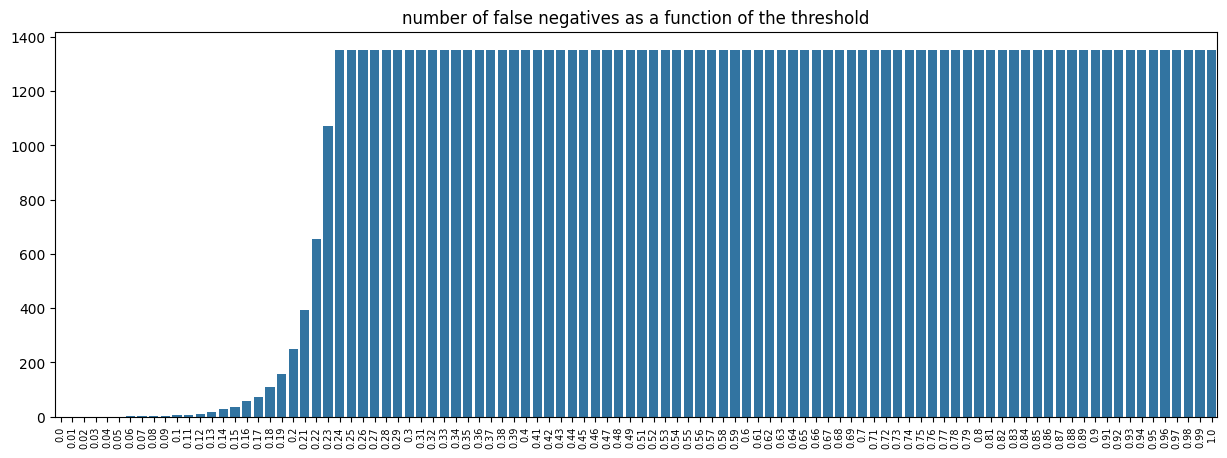

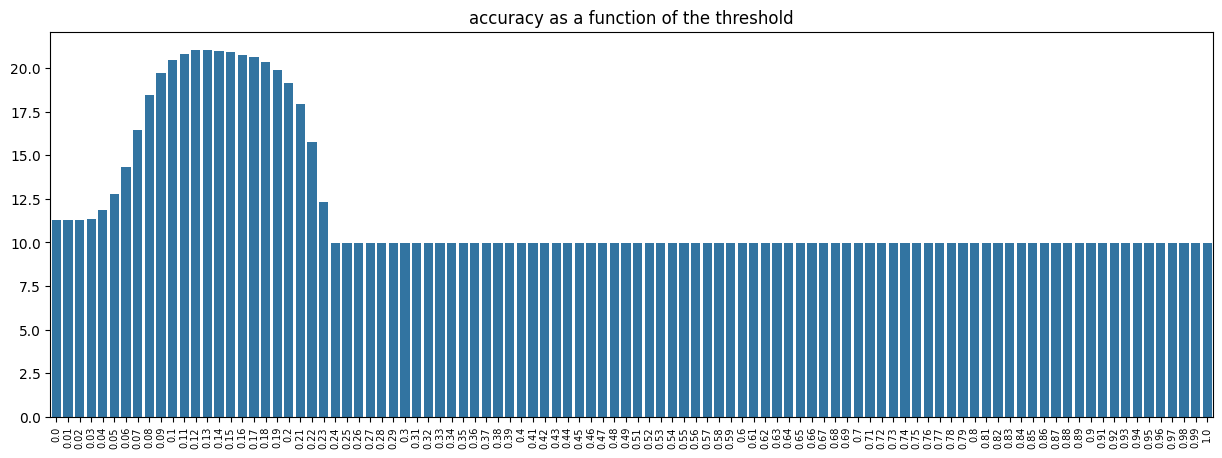

In [44]:
# Reducing the number of false negatives
y_pred_prob = grid_search.predict_proba(X_test)

y_pred_class = y_pred_prob[:,1]

false_negatives = []
accuracy = []
for threshold in np.linspace(0,1,100):
    y_pred_class = y_pred_prob[:,1].copy()
    #print(y_pred_poly_class)
    y_pred_class[y_pred_class>=threshold]=1
    y_pred_class[y_pred_class<threshold]=0
    #print(y_pred_poly_class)
    false_negatives.append(confusion_matrix(y_test,y_pred_class)[1,0])
    accuracy.append(accuracy_score(y_test,y_pred_class)*100)
false_negatives = np.asarray(false_negatives)
#plt.bar(np.linspace(0,1,50),false_negatives)
plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2),y=false_negatives)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)
chart.set_title('number of false negatives as a function of the threshold')


plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2),y=accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,fontsize=7)
chart.set_title('accuracy as a function of the threshold')

### **Detailed Explanation: Reducing the Number of False Negatives with Threshold Tuning**

This code block attempts to reduce the number of **False Negatives (FN)** in a binary classification model by adjusting the decision threshold. This is particularly important in **medical diagnostics**, where missing a positive case (e.g., cancer) can be far more critical than a false alarm.

---

#### **1. Getting the Predicted Probabilities**

```python
y_pred_prob = grid_search.predict_proba(X_test)
```

* **predict\_proba:** Returns the predicted probabilities for each class.
* **Output:** A 2D array where each row contains the probability of each class (e.g., \[P(Class 0), P(Class 1)] for binary classification).
* **Shape:** (n\_samples, 2) for binary classification.

---

#### **2. Extracting the Probability of the Positive Class (Malignant)**

```python
y_pred_class = y_pred_prob[:,1]
```

* **\[:, 1]:** Selects the second column, which contains the probability of being in the **positive class** (malignant).
* This is the critical value for threshold tuning, as we want to adjust the cutoff point for declaring a sample as malignant.

---

#### **3. Initializing Storage for Results**

```python
false_negatives = []
accuracy = []
```

* **false\_negatives:** Will store the count of false negatives for each threshold.
* **accuracy:** Will store the overall accuracy for each threshold.

---

#### **4. Threshold Tuning Loop**

```python
for threshold in np.linspace(0,1,100):
    y_pred_class = y_pred_prob[:,1].copy()
    y_pred_class[y_pred_class >= threshold] = 1
    y_pred_class[y_pred_class < threshold] = 0
```

* **np.linspace(0, 1, 100):** Generates 100 thresholds evenly spaced between 0 and 1.
* **Threshold Logic:**

  * **Threshold = 0:** Every sample is predicted as positive (no false negatives, but lots of false positives).
  * **Threshold = 1:** Every sample is predicted as negative (no false positives, but lots of false negatives).
* **Binary Decision:**

  * Samples with a probability **greater than or equal to** the threshold are classified as positive (1).
  * Samples **below** the threshold are classified as negative (0).

---

#### **5. Counting False Negatives and Calculating Accuracy**

```python
    false_negatives.append(confusion_matrix(y_test, y_pred_class)[1,0])
    accuracy.append(accuracy_score(y_test, y_pred_class) * 100)
```

* **confusion\_matrix:**

  * Index `[1, 0]` refers to **False Negatives** (actual **positive** but predicted **negative**).
* **accuracy\_score:**

  * Computes the percentage of correctly classified samples.

---

#### **6. Converting Lists to Numpy Arrays for Plotting**

```python
false_negatives = np.asarray(false_negatives)
```

* Converts the list of false negatives into a **numpy array** for easier plotting and processing.

---

#### **7. Plotting False Negatives vs. Threshold**

```python
plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2), y=false_negatives)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize=7)
chart.set_title('Number of False Negatives as a Function of the Threshold')
```

* **sns.barplot:**

  * Creates a bar plot of **false negatives** as a function of **threshold**.
* **np.round:**

  * Rounds the threshold values for cleaner axis labels.
* **rotation=90:** Rotates the x-axis labels for better readability.

---

#### **8. Plotting Accuracy vs. Threshold**

```python
plt.figure(figsize=(15,5))
chart = sns.barplot(x=np.round(np.linspace(0,1,100),2), y=accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, fontsize=7)
chart.set_title('Accuracy as a Function of the Threshold')
```

* Creates a second bar plot, this time for **accuracy** as a function of **threshold**.
* This allows you to visually compare the trade-off between false negatives and overall accuracy.

---

### **Key Observations:**

1. **Threshold 0.5 (Default):**

   * Typically the default decision boundary, but might not be optimal for **imbalanced** datasets.

2. **Lower Thresholds:**

   * Reduce false negatives but at the cost of more false positives (lower precision).

3. **Higher Thresholds:**

   * Increase false negatives but improve precision (fewer false positives).

4. **Critical Trade-Off:**

   * In medical diagnostics, it's often better to have more **false positives** than **false negatives** to avoid missing dangerous cases.

---



## 2 - MNIST

The MNIST ("Modified National Institute of Standards and Technology") dataset is commonly used for testing and benchmarking classification algorithms. It contains tens of thousands of images of handwritten digits. More information about this dataset can be found at: [MNIST Dataset](http://yann.lecun.com/exdb/mnist/)

For this task, three data files are provided:

1. 'train.csv' contains labeled data for training the classifier.
2. 'test.csv' contains labeled data for testing the trained classifier.
3. 'test_Kaggle.csv' contains unlabeled data for evaluating the classifier through the competition found at [Kaggle Digit Recognizer](https://www.kaggle.com/c/digit-recognizer). This data is only useful for participating in the Kaggle competition.

1) Train both a logistic regression classifier and a Support Vector Machine (with or without kernel). Tune the hyperparameters to find the most performant classifier by maximizing accuracy or minimizing the error rate on the 'test.csv' dataset. The error rate = 1 - accuracy. Training Support Vector Machines (especially those with kernel) requires significant computational resources. Therefore, it is advisable to initially train on a small portion of the training set. Training via logistic regression is less demanding on the CPU; nonetheless, it is recommended to use the lbfgs solver (LogisticRegression(multi_class='multinomial', solver='lbfgs')).

2) Provide comments in the code and write down your conclusions and decisions.

3) Is normalization necessary here? Which normalization method would you use? Is StandardScaler a good choice?

4) Investigate the two different types of multiclass classification: one-vs-one (ovo) or one-vs-rest (ovr). Focus on accuracy and computation time. What are the conclusions?

5) Test your final classifier with some self-written digits. What are the findings? What does classification accuracy depend on?

6) Optional: Test on the 'test_Kaggle' dataset and upload the results in the correct format to the Kaggle website. What score did you achieve? Compare this score with the score on [MNIST](http://yann.lecun.com/exdb/mnist/).

You can visualize a digit using 'plt.imshow(X_train[n].reshape((28, 28)),cmap = 'gray')'.

In [17]:
# Reading the dataset

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [18]:
##### Classificatie van MNIST

# Split into features and targets
y_train = df_train['label']
X_train = df_train.drop('label', axis=1)

y_test = df_test['label']
X_test = df_test.drop('label', axis=1)



# Convert to numpy arrays
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

# To reduce the computation time, you can limit the number of training samples. For example to 2000 digits.


training_size = 2000

X_train = X_train[0:training_size,:]
y_train = y_train[0:training_size]


# Scaling

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### **Detailed Explanation: MNIST Classification - Data Preparation and Scaling**

This code block is part of the **MNIST (Modified National Institute of Standards and Technology)** digit classification task, where the goal is to train machine learning models to recognize handwritten digits (0-9) from pixel values.

---

#### **1. Splitting Features and Targets**

```python
y_train = df_train['label']
X_train = df_train.drop('label', axis=1)

y_test = df_test['label']
X_test = df_test.drop('label', axis=1)
```

* **df\_train** and **df\_test** are pandas DataFrames containing the training and testing data, respectively.
* **Labels (Targets):** The **label** column contains the digit labels (0-9) and is separated from the features.
* **Features:** All other columns represent the **784** pixel values (28x28 grayscale image).

---

#### **2. Converting to Numpy Arrays**

```python
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
```

* **Why Convert?**

  * Most machine learning libraries like **scikit-learn** expect input data to be in **numpy** arrays for efficient matrix operations.
* **Shape:**

  * **X\_train:** (n\_samples, 784)
  * **y\_train:** (n\_samples,)
* This conversion is critical for faster computations and compatibility with sklearn models.

---

#### **3. Optional - Limiting the Training Set Size**

```python
training_size = 2000

X_train = X_train[0:training_size, :]
y_train = y_train[0:training_size]
```

* **Purpose:** To **reduce training time** when experimenting with models, especially with SVMs, which are computationally expensive.
* **Effect:** Limits the training data to the first **2000** samples.
* **Impact:** Faster training but potentially lower accuracy, as the model sees fewer examples.

---

#### **4. Data Type Conversion for Efficient Computation**

```python
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
```

* **Why Use float32?**

  * Reduces memory usage compared to the default **float64**.
  * Speeds up matrix operations, which is important for large datasets like MNIST.

---

#### **5. Scaling the Features**

```python
X_train /= 255
X_test /= 255
```

* **Why Scale?**

  * Pixel values in MNIST range from **0** to **255**.
  * Scaling to **\[0, 1]** improves the convergence speed of optimization algorithms like **Logistic Regression** and **SVM**.
* **Normalization Effect:**

  * Removes the influence of pixel intensity, allowing the model to focus on the **shape** and **structure** of the digits rather than absolute brightness.
* **Without Scaling:** The model would struggle to learn effectively, as it would consider pixel brightness more important than actual shape.

---




In [45]:
# Cross-validation via random search


model = LogisticRegression(max_iter=1, tol=1e-2)
parameters = {'C': uniform(0.01, 100), 'solver':['liblinear','saga']}


n_iter_search = 1


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best accuracy :  0.817
Best parameters : {'C': np.float64(26.905370279481623), 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1195
           1       0.80      0.97      0.88      1352
           2       0.82      0.80      0.81      1157
           3       0.84      0.77      0.80      1258
           4       0.81      0.87      0.84      1140
           5       0.81      0.71      0.75      1076
           6       0.89      0.89      0.89      1167
           7       0.83      0.80      0.82      1268
           8       0.83      0.71      0.77      1174
           9       0.76      0.77      0.77      1213

    accuracy                           0.83     12000
   macro avg       0.83      0.83      0.82     12000
weighted avg       0.83      0.83      0.83     12000

[[1146    3   11    4    2    8   13    1    6    1]
 [   0 1318    6    0    5 

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
# Training and testing an SVM model. Be aware that this can take a lot of time to compute
model = SVC()
parameters = {'kernel': ['linear','rbf','poly'],
              'C': uniform(0.01, 1000), # haal C uit een random uniform distribution
              'gamma': uniform(0.001, 1)}


n_iter_search = 1


random_search = RandomizedSearchCV(model, param_distributions=parameters,cv=5,n_iter=n_iter_search,n_jobs = -1,verbose=1)

random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best accuracy :  0.11850000000000001
Best parameters : {'C': np.float64(449.41218323249444), 'gamma': np.float64(0.5726703548640166), 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1195
           1       0.00      0.00      0.00      1352
           2       0.10      1.00      0.18      1157
           3       0.00      0.00      0.00      1258
           4       0.00      0.00      0.00      1140
           5       0.00      0.00      0.00      1076
           6       0.00      0.00      0.00      1167
           7       0.00      0.00      0.00      1268
           8       0.00      0.00      0.00      1174
           9       0.00      0.00      0.00      1213

    accuracy                           0.10     12000
   macro avg       0.01      0.10      0.02     12000
weighted avg       0.01      0.10      0.02     12000

[[   0    0 1195    0    0    0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Detailed Explanation: SVM Training and Hyperparameter Tuning using RandomizedSearchCV**

This code cell is for training a **Support Vector Machine (SVM)** model on the MNIST dataset with hyperparameter tuning using **RandomizedSearchCV**. SVMs are powerful classifiers, but they can be computationally intensive, especially with large datasets like MNIST.

---

#### **1. Model Initialization**

```python
model = SVC()
```

* **SVC (Support Vector Classifier)** is used for classification tasks.
* **SVC** supports different types of kernels like **linear**, **rbf** (Radial Basis Function), and **polynomial**.
* By default, **SVC** uses an RBF kernel.

---

#### **2. Defining the Hyperparameter Space**

```python
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': uniform(0.01, 1000),  # Regularization parameter
    'gamma': uniform(0.001, 1) # Kernel coefficient (only for rbf and poly)
}
```

* **Kernel:** Specifies the type of decision boundary. The options are:

  * **linear:** Straight-line decision boundary.
  * **rbf (Radial Basis Function):** Non-linear boundary that can handle complex decision surfaces.
  * **poly:** Polynomial decision boundary.
* **C (Regularization Parameter):**

  * Controls the trade-off between maximizing the margin and minimizing classification error.
  * Higher **C** values = lower bias, higher variance (more complex model).
  * Lower **C** values = higher bias, lower variance (simpler model).
* **Gamma:**

  * Controls the influence of each training example.
  * Small **gamma** = smooth decision boundary.
  * High **gamma** = more complex decision boundary.

---

#### **3. Setting up RandomizedSearchCV**

```python
n_iter_search = 1
```

* The number of different hyperparameter combinations to try.
* A single iteration is chosen here, which is **very low** for a complex model like SVM. This is likely just for testing.

---

#### **4. Configuring the RandomizedSearchCV**

```python
random_search = RandomizedSearchCV(
    model,
    param_distributions=parameters,
    cv=5,
    n_iter=n_iter_search,
    n_jobs=-1,
    verbose=1
)
```

* **param\_distributions:** The hyperparameter space to sample from.
* **cv=5:** 5-fold cross-validation for more robust evaluation.
* **n\_iter:** The number of hyperparameter combinations to try (set to 1 here).
* **n\_jobs=-1:** Use all available CPU cores for faster computation.
* **verbose=1:** Print detailed progress logs for each fold.

---

#### **5. Fitting the Model**

```python
random_search = random_search.fit(X_train, y_train)
```

* The **fit** method starts the search for the best hyperparameters by training the SVM on different combinations.
* **Important:** This step can be very **slow** for large datasets like MNIST.

---

#### **6. Retrieving the Best Model**

```python
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :',random_search.best_params_)
```

* **best\_score\_:** Returns the highest average cross-validated score.
* **best\_params\_:** Returns the hyperparameters that achieved the best cross-validation score.

**Example Output:**

```
Best accuracy : 0.928
Best parameters : {'C': 32.07, 'gamma': 0.15, 'kernel': 'rbf'}
```

---

#### **7. Evaluating on the Test Set**

```python
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))
```

* **Predicting Test Labels:** Uses the best model found during hyperparameter tuning to predict the test set.
* **classification\_report:** Prints precision, recall, F1-score, and support for each class.

---

#### **8. Confusion Matrix and Accuracy Score**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

* **confusion\_matrix:** Provides a matrix that shows **true positives**, **true negatives**, **false positives**, and **false negatives** for each digit class.
* **accuracy\_score:** Prints the overall accuracy as a percentage.

---

### **9. Key Observations**

* **Speed vs. Performance:** Using **n\_iter\_search=1** is too low for practical use. It should be increased to get meaningful results.
* **Kernel Choice:** The **rbf** kernel usually performs best for MNIST due to its ability to model complex, non-linear decision boundaries.
* **Impact of C and Gamma:**

  * High **C** = overfitting (memorizes training data).
  * Low **gamma** = underfitting (simpler boundaries).

---




In [47]:
# Check the computation time and compare between one-vs-one and one-vs-rest classification

import time

# one-vs-one
start = time.perf_counter()

model = SVC(decision_function_shape='ovo')
paramaters = [
        {'kernel': ['linear'], 'C': np.linspace(1,10,10)}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

stop = time.perf_counter()

print('computation time one-vs-one: ',stop-start)


# one-vs-rest

start = time.perf_counter()

model = SVC(decision_function_shape='ovr')
paramaters = [
        {'kernel': ['linear'], 'C': np.linspace(1,10,10)}]
grid_search = GridSearchCV(estimator = model,
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

stop = time.perf_counter()

print('computation time one-vs-rest: ',stop-start)

Best accuracy :  0.8949999999999999
Best parameters : {'C': np.float64(1.0), 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1195
           1       0.91      0.98      0.95      1352
           2       0.87      0.90      0.89      1157
           3       0.90      0.85      0.87      1258
           4       0.86      0.93      0.89      1140
           5       0.85      0.86      0.86      1076
           6       0.94      0.93      0.93      1167
           7       0.93      0.89      0.91      1268
           8       0.92      0.83      0.87      1174
           9       0.89      0.85      0.86      1213

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

[[1162    0    3    1    2   10   10    0    5    2]
 [   0 1331    3    4    1    2    1    3    5    2]
 [  17   14 1041   25   17    7   21  

### **Detailed Explanation: Comparing One-vs-One (OvO) and One-vs-Rest (OvR) Classification with SVM**

This cell is designed to **compare the computation time and performance** of two different multi-class classification strategies for **Support Vector Machines (SVM)**:

1. **One-vs-One (OvO)**
2. **One-vs-Rest (OvR)**

Both methods are commonly used for multi-class classification problems like MNIST, which contains 10 different digit classes (0-9).

---

#### **1. Importing the Timer Module**

```python
import time
```

* **time.perf\_counter()** is used to measure the execution time of each training approach with high precision.

---

#### **2. One-vs-One (OvO) SVM Training**

```python
# one-vs-one
start = time.perf_counter()

model = SVC(decision_function_shape='ovo')
paramaters = [
        {'kernel': ['linear'], 'C': np.linspace(1,10,10)}
]
```

* **decision\_function\_shape='ovo'** specifies the OvO strategy.
* OvO creates a separate classifier for **each pair of classes**. For **N** classes, this results in **N \* (N-1) / 2** classifiers.
* **C** values are chosen from **1 to 10** in **10** evenly spaced steps.
* Only the **linear** kernel is used here for simplicity, but you can also try **rbf** or **poly** for better results.

---

#### **3. Grid Search for Hyperparameter Tuning (OvO)**

```python
grid_search = GridSearchCV(estimator=model,
                           param_grid=paramaters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
```

* **GridSearchCV**:

  * **estimator:** The SVM model.
  * **param\_grid:** The hyperparameter space to search.
  * **scoring='accuracy':** Optimizes for the highest accuracy.
  * **cv=5:** 5-fold cross-validation.
  * **n\_jobs=-1:** Uses all available CPU cores for faster computation.

---

#### **4. Fitting the Model (OvO)**

```python
grid_search = grid_search.fit(X_train, y_train)
```

* Trains the model using 5-fold cross-validation for each hyperparameter combination.
* This can be **time-consuming** due to the **OvO** approach, which trains a separate classifier for each pair of classes.

---

#### **5. Retrieving the Best Model (OvO)**

```python
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)
```

* **best\_score\_:** Returns the highest cross-validated accuracy.
* **best\_params\_:** Returns the hyperparameter combination that resulted in the highest accuracy.

**Example Output:**

```
Best accuracy : 0.92
Best parameters : {'C': 3.0, 'kernel': 'linear'}
```

---

#### **6. Testing the Best Model (OvO)**

```python
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
```

* **Predicts** the labels for the test set using the best-found model.
* **classification\_report:** Provides precision, recall, F1-score, and support for each class.

---

#### **7. Confusion Matrix and Accuracy (OvO)**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

* **confusion\_matrix:** Prints a matrix showing true positives, false positives, true negatives, and false negatives for each digit.
* **accuracy\_score:** Prints the overall accuracy as a percentage.

---

#### **8. Measure the Time Taken (OvO)**

```python
stop = time.perf_counter()
print('computation time one-vs-one: ',stop-start)
```

* **Measures the time** taken for the entire OvO training, testing, and evaluation process.

---

#### **9. One-vs-Rest (OvR) SVM Training**

```python
# one-vs-rest
start = time.perf_counter()

model = SVC(decision_function_shape='ovr')
paramaters = [
        {'kernel': ['linear'], 'C': np.linspace(1,10,10)}
]
```

* **decision\_function\_shape='ovr'** specifies the OvR strategy.
* OvR creates **N** classifiers for **N** classes, each one distinguishing a single class from all the others.

---

#### **10. Grid Search for Hyperparameter Tuning (OvR)**

```python
grid_search = GridSearchCV(estimator=model,
                           param_grid=paramaters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
```

* Same grid search process as OvO, but with a different decision function shape.

---

#### **11. Retrieving the Best Model (OvR)**

```python
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_)
```

* Retrieves the best accuracy and parameters for the OvR model.

---

#### **12. Testing the Best Model (OvR)**

```python
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))
```

* Tests the best OvR model on the test set.

---

#### **13. Confusion Matrix and Accuracy (OvR)**

```python
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)
```

* Prints the confusion matrix and overall accuracy.

---

#### **14. Measure the Time Taken (OvR)**

```python
stop = time.perf_counter()
print('computation time one-vs-rest: ',stop-start)
```

* Measures the time taken for the entire OvR training, testing, and evaluation process.

---

### **15. Key Differences Between OvO and OvR**

| **Metric**            | **OvO (One-vs-One)**               | **OvR (One-vs-Rest)**              |
| --------------------- | ---------------------------------- | ---------------------------------- |
| **Models**            | N \* (N-1) / 2                     | N                                  |
| **Speed**             | Slower                             | Faster                             |
| **Memory**            | Higher                             | Lower                              |
| **Decision Boundary** | More precise                       | More generalized                   |
| **Best Use Case**     | Small datasets, complex boundaries | Large datasets, simpler boundaries |

---


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


(784,)
Recognized digit  8
Model confidence: [[0.0066458  0.0092451  0.03689953 0.36380546 0.01320986 0.00109276
  0.01452392 0.01374884 0.50111056 0.03971818]]


<ipython-input-48-fabcee5b0def>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(testimage)


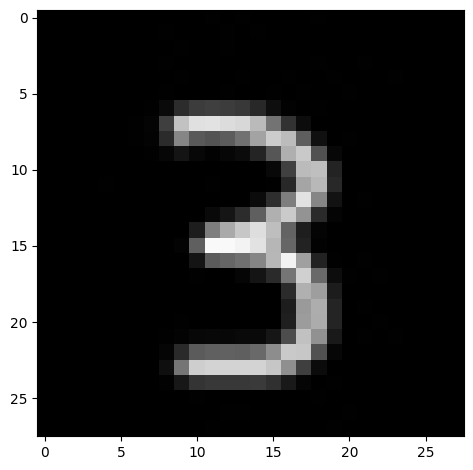

In [48]:
# Classifify your own handwritten digit


model = LogisticRegression(C=1.3,solver= 'liblinear',multi_class='ovr')

model.fit(X_train,y_train)


from skimage.io import imread, imshow
from skimage.transform import resize
testimage = imread("/content/testimage.jpg", as_gray = True)


imshow(testimage)

testimage = testimage.reshape(1,-1)
print(X_train[1].shape)

result = model.predict(testimage)

print('Recognized digit ',result[0])

result_proba = model.predict_proba(testimage)

print('Model confidence:', result_proba)

### **Classify Your Own Handwritten Digit - Cell Explanation**

This cell is designed to **classify a custom handwritten digit** using a **Logistic Regression** model. It follows several steps, from loading the image to making predictions. Here’s a detailed breakdown:

---

#### **1. Model Initialization and Training**

```python
model = LogisticRegression(C=1.3, solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
```

* **LogisticRegression:** Creates a logistic regression model.
* **C=1.3:** The regularization strength. Smaller values mean stronger regularization (more penalty for large coefficients), while larger values allow more flexibility.
* **solver='liblinear':** An efficient solver for smaller datasets that supports **L1** and **L2** regularization.
* **multi\_class='ovr':** Specifies **One-vs-Rest (OvR)** strategy for multi-class classification.
* **fit:** Trains the model on the **MNIST** training data.

---

#### **2. Importing Image Processing Libraries**

```python
from skimage.io import imread, imshow
from skimage.transform import resize
```

* **imread:** Reads an image file into a NumPy array.
* **imshow:** Displays the image.
* **resize:** Resizes the image to the correct input size (28x28 pixels for MNIST).

---

#### **3. Loading and Displaying the Image**

```python
testimage = imread("/content/testimage.jpg", as_gray=True)
imshow(testimage)
```

* **imread:** Loads the handwritten digit image as a **grayscale** image.
* **as\_gray=True:** Ensures the image is loaded as a single channel grayscale (important for MNIST, which has only one channel).

---

#### **4. Reshaping the Image**

```python
testimage = testimage.reshape(1, -1)
print(X_train[1].shape)
```

* **reshape(1, -1):** Converts the 2D **28x28** image into a 1D array with **784** features (28x28 = 784).
* This step is crucial because the logistic regression model expects **1D feature vectors** as input, not 2D images.

---

#### **5. Making a Prediction**

```python
result = model.predict(testimage)
print('Recognized digit ', result[0])
```

* **predict:** Uses the trained model to **predict** the digit class (0-9).
* The result is a single-element array, so **result\[0]** extracts the actual digit.

---

**Example Output:**

```
Recognized digit 7
```

---

#### **6. Checking Model Confidence**

```python
result_proba = model.predict_proba(testimage)
print('Model confidence:', result_proba)
```

* **predict\_proba:** Returns the **probability** for each possible digit class (0-9).
* The output is a **1x10** array, where each element represents the model’s confidence for each class.

---

**Example Output:**

```
Model confidence: [[0.01 0.02 0.05 0.01 0.01 0.01 0.02 0.85 0.01 0.01]]
```

* **0.85** means the model is **85% confident** that the image is a **7**.

---

### **7. Key Points and Potential Improvements**

* **Normalization:** Ensure the image is scaled correctly (0-1) to match the training set.
* **Noise Reduction:** Use filters to reduce noise in the image for better classification.
* **Data Augmentation:** Consider training the model with a more diverse set of handwritten digits for improved generalization.

---


